In [2]:
#Basic Imports
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import  RandomForestClassifier

import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df2012 = pd.read_stata('data/SETUPS2012/SETUPS2012.dta')
df2016 = pd.read_stata('data/SETUPS2016/SETUPS2016.dta')
df2020 = pd.read_stata('data/SETUPS2020/SETUPS2020.dta')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7452
Columns: 257 entries, CASEID to WEIGHT
dtypes: category(255), float64(1), int32(1)
memory usage: 2.0 MB


In [11]:
df2012.shape, df2016.shape, df2020.shape

((5914, 195), (3649, 204), (7453, 257))

In [12]:
df2020

,CASEID,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,R10,R11,R12,R13,R14,R15,R16,R17,R18,WEIGHT
0,200015,0. Did not vote,9. NA,9. NA,9. NA,9. NA,7. Strong Republican,2. Republican party,1. 0 through 24,5. 76 through 100,...,3. Hispanic,4. Bachelor's degree,"7. $125,000 or more",4. Divorced,"1. Yes, living with a partner",1. Heterosexual or straight,3. Have never served on active duty,2. No,4. City,0.611133
1,200022,1. Voted,3. Jo Jorgensen,9. NA,9. NA,9. NA,4. Independent,3. None or 'independent',1. 0 through 24,3. 50,...,4. Asian or Native Hawaiian/other Pacific Isla...,"3. Some post-high school, no bachelor's degree","4. $50,000 to $74,999",1. Married: spouse present,9. NA,1. Heterosexual or straight,3. Have never served on active duty,2. No,3. Suburb,1.209783
2,200039,1. Voted,1. Joe Biden,1. Voted for the Democratic candidate,1. Voted for the Democratic candidate,9. NA,3. Independent-Democrat,9. NA,4. 51 through 75,1. 0 through 24,...,"1. White, non-Hispanic",2. High school credential,"6. $100,000 to $124,999",1. Married: spouse present,9. NA,1. Heterosexual or straight,3. Have never served on active duty,2. No,3. Suburb,0.823936
3,200046,1. Voted,1. Joe Biden,2. Voted for the Republican candidate,9. NA,9. NA,6. Not very strong Republican,2. Republican party,3. 50,4. 51 through 75,...,4. Asian or Native Hawaiian/other Pacific Isla...,"3. Some post-high school, no bachelor's degree","3. $35,000 to $49,999",1. Married: spouse present,9. NA,1. Heterosexual or straight,3. Have never served on active duty,2. No,2. Small town,0.512837
4,200053,1. Voted,2. Donald Trump,2. Voted for the Republican candidate,2. Voted for the Republican candidate,9. NA,4. Independent,3. None or 'independent',1. 0 through 24,4. 51 through 75,...,5. Native American/Alaska Native or other race...,5. Graduate degree,"7. $125,000 or more",3. Widowed,"2. No, not living with a partner",1. Heterosexual or straight,3. Have never served on active duty,2. No,4. City,0.856575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7448,535315,0. Did not vote,9. NA,9. NA,9. NA,9. NA,7. Strong Republican,2. Republican party,1. 0 through 24,5. 76 through 100,...,"1. White, non-Hispanic","3. Some post-high school, no bachelor's degree","3. $35,000 to $49,999",1. Married: spouse present,9. NA,1. Heterosexual or straight,3. Have never served on active duty,2. No,2. Small town,1.480103
7449,535360,1. Voted,2. Donald Trump,2. Voted for the Republican candidate,2. Voted for the Republican candidate,9. NA,6. Not very strong Republican,2. Republican party,2. 25 through 49,4. 51 through 75,...,"1. White, non-Hispanic",4. Bachelor's degree,"7. $125,000 or more",1. Married: spouse present,9. NA,1. Heterosexual or straight,3. Have never served on active duty,2. No,4. City,1.503653
7450,535414,1. Voted,1. Joe Biden,9. NA,9. NA,9. NA,1. Strong Democrat,1. Democratic party,5. 76 through 100,3. 50,...,3. Hispanic,2. High school credential,"5. $75,000 to $99,999",1. Married: spouse present,9. NA,1. Heterosexual or straight,3. Have never served on active duty,2. No,3. Suburb,1.150732
7451,535421,1. Voted,2. Donald Trump,2. Voted for the Republican candidate,2. Voted for the Republican candidate,9. NA,7. Strong Republican,9. NA,1. 0 through 24,4. 51 through 75,...,"1. White, non-Hispanic","3. Some post-high school, no bachelor's degree","5. $75,000 to $99,999",4. Divorced,"2. No, not living with a partner",1. Heterosexual or straight,3. Have never served on active duty,2. No,1. Rural area,0.281583


In [12]:
# drop = ['No post data, incomplete IW',
#                   'Other Presidential candidate: preference (nonvoter)',
#                   'Republican Presidential candidate: preference (nonvoter)',
#                   'Democratic Presidential candidate: preference (nonvoter)',
#                   'Other Presidential candidate: voted for candidate',
#                   'Inapplicable', 'No post-election interview']

In [13]:
# df.drop(df[df['V162058X'] == drop[0]].index, inplace = True)
# df.drop(df[df['V162058X'] == drop[1]].index, inplace = True)
# df.drop(df[df['V162058X'] == drop[2]].index, inplace = True)
# df.drop(df[df['V162058X'] == drop[3]].index, inplace = True)
# df.drop(df[df['V162058X'] == drop[4]].index, inplace = True)
# df.drop(df[df['V162058X'] == drop[5]].index, inplace = True)
# df.drop(df[df['V162058X'] == drop[6]].index, inplace = True)

In [14]:
# df['V162058X'].value_counts()

Democratic Presidential candidate: voted for candidate      1290
Republican Presidential candidate: voted for candidate      1178
Other Presidential candidate: preference (nonvoter)            0
Republican Presidential candidate: preference (nonvoter)       0
Democratic Presidential candidate: preference (nonvoter)       0
Other Presidential candidate: voted for candidate              0
Inapplicable                                                   0
No post-election interview                                     0
No post data, incomplete IW                                    0
Name: V162058X, dtype: int64

In [15]:
# df['V162058X']

0       Republican Presidential candidate: voted for c...
1       Republican Presidential candidate: voted for c...
5       Republican Presidential candidate: voted for c...
6       Democratic Presidential candidate: voted for c...
7       Republican Presidential candidate: voted for c...
                              ...                        
4264    Republican Presidential candidate: voted for c...
4265    Democratic Presidential candidate: voted for c...
4266    Democratic Presidential candidate: voted for c...
4267    Republican Presidential candidate: voted for c...
4269    Democratic Presidential candidate: voted for c...
Name: V162058X, Length: 2468, dtype: category
Categories (9, object): ['No post data, incomplete IW' < 'No post-election interview' < 'Inapplicable' < 'Democratic Presidential candidate: voted for ... ... 'Other Presidential candidate: voted for candi... < 'Democratic Presidential candidate: preference... < 'Republican Presidential candidate: preference... < '

In [ ]:
#y = df['V162058X']
#X= df[["V160001", "V160101", "V160101F", "V160101W", "V160102", "V160102F", "V160102W"]]

In [16]:
#y = df['V162058X']
#X= df.drop('V162058X', axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Decision Tree

In [28]:
data_train, data_test, target_train, target_test = train_test_split(X, y, random_state=42)

In [29]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [30]:
DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier(max_depth=5)

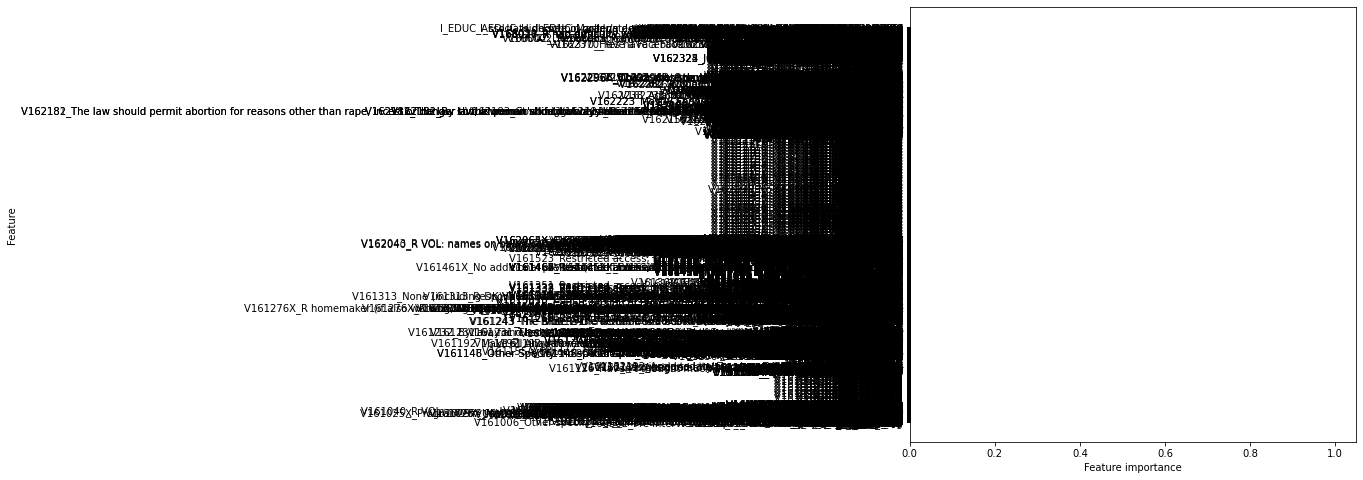

In [31]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [28]:
pred = tree_clf.predict(data_test)
print(classification_report(target_test, pred))

                                                        precision    recall  f1-score   support

Democratic Presidential candidate: voted for candidate       0.55      0.78      0.64       329
Republican Presidential candidate: voted for candidate       0.51      0.27      0.35       288

                                              accuracy                           0.54       617
                                             macro avg       0.53      0.52      0.50       617
                                          weighted avg       0.53      0.54      0.51       617



# Random Forest

In [29]:
forest = RandomForestClassifier(n_estimators=50, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

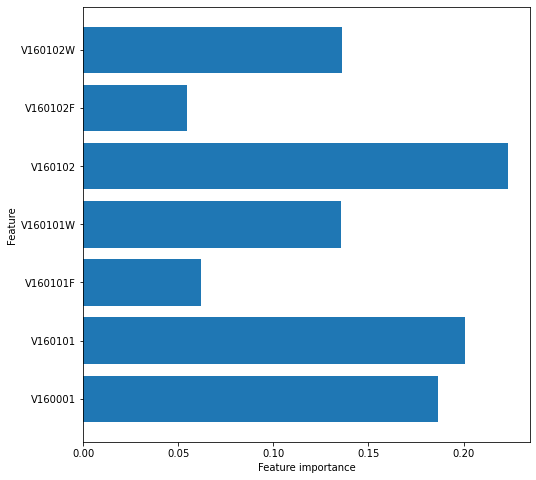

In [30]:
plot_feature_importances(forest)